In [1]:
import pandas as pd
import datetime
import dateutil
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.outliers_influence import summary_table

In [3]:
#df = pd.read_csv("events/events_dataframe_en.csv", converters={'redirects': pd.eval, 'list_views_7_days':pd.eval})
df = pd.read_csv("events/events_dataframe_de.csv", converters={'redirects': pd.eval, 'list_views_7_days':pd.eval})
df.head(5)

,pagetitle,event_date,economic_region,continent,cat,categories,views_7_sum,views_before_mean,views_before_sum,views_before_max,views_before_min,views_before_median,views_before_increase,list_views_7_days,diff_days,year,planed,surprising,factor,views_7_days_mean
0,Swedish Open 2015,2015-07-01,Global North,Europe,sports,"['Kategorie:ATP World Tour 2015', 'Kategorie:T...",0,0.0,0,0,0,0.0,0,[],18,2015,not_planed,not_surprising,after,0.000000
1,Tour de France 2015/1. Etappe,2015-07-04,Global North,Europe,sports,"['Kategorie:Tour-de-France-Etappe', 'Kategorie...",0,0.0,0,0,0,0.0,0,[],-1,2015,planed,not_surprising,before,0.000000
2,Super High Roller Bowl 2015,2015-07-04,Global North,North America,sports,"['Kategorie:Pokerturnier 2015', 'Kategorie:Pok...",0,0.0,0,0,0,0.0,0,[],636,2015,not_planed,not_surprising,after,0.000000
3,Griechisches Referendum 2015,2015-07-05,Global North,Europe,politics,"['Kategorie:Eurokrise', 'Kategorie:Griechische...",37404,3421.0,13684,4032,2471,3590.5,-999,"[10231, 16293, 4343, 2445, 1738, 1310, 912]",-9,2015,planed,not_surprising,before,5324.571429
4,Großer Preis von Großbritannien 2015,2015-07-05,Global North,Europe,sports,"['Kategorie:Großer Preis von Großbritannien', ...",1155,126.5,253,158,95,126.5,63,"[474, 365, 116, 68, 49, 42, 41]",-123,2015,planed,not_surprising,before,165.000000


In [55]:
# views_7_days_mean   ... mean of views wihtin 7 days after event
# list_views_7_days   ... list of views within 7 days after event
# views_7_sum         ... sum of views within 7 days after event (incl. redirects)
# views_before_mean   ... mean of views 7 days before event
# views_before_min    ... min of views 7 days before event
# ...

In [4]:
df_zero = df[df["views_7_sum"] == 0]
df = df[df["views_7_sum"] != 0]
df = df[df.cat != ""]
df["pagetitle"].count()

1017

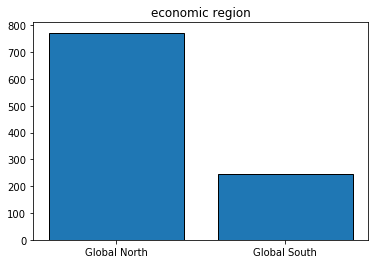

In [5]:
x = ['Global North', 'Global South']
a = len(df[(df["economic_region"]=="Global North")])
b = len(df[(df["economic_region"]=="Global South")])
y1 = np.array([a, b])

plt.figure(figsize=(6,4))
p = plt.bar(x, y1,edgecolor="k")
plt.title("economic region")
plt.show()

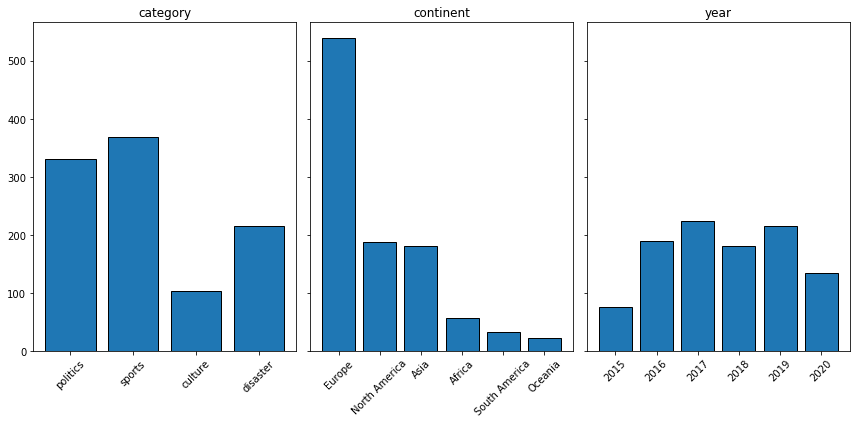

In [6]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(12, 6),tight_layout=True)

x = ['politics', 'sports','culture', 'disaster']
a = len(df[(df["cat"]=="politics")])
b = len(df[(df["cat"]=="sports")])
c = len(df[(df["cat"]=="culture")])
d = len(df[(df["cat"]=="disaster")])
y1 = np.array([a, b, c, d,])

bar1 = axs[0].bar(x, y1,edgecolor="k")
axs[0].set_title("category")
axs[0].tick_params(axis='x', labelrotation=45 )

x = ['Europe', 'North America','Asia', 'Africa','South America', 'Oceania']
a = len(df[(df["continent"]=="Europe")])
b = len(df[(df["continent"]=="North America")])
c = len(df[(df["continent"]=="Asia")])
d = len(df[(df["continent"]=="Africa")])
e = len(df[(df["continent"]=="South America")])
f = len(df[(df["continent"]=="Oceania")])
y1 = np.array([a, b, c, d, e, f])

bar2 = axs[1].bar(x, y1,edgecolor="k")
axs[1].set_title("continent")
axs[1].tick_params(axis='x', labelrotation=45 )

x = ['2015', '2016','2017', '2018','2019','2020']
a = len(df[(df["year"]==2015)])
b = len(df[(df["year"]==2016)])
c = len(df[(df["year"]==2017)])
d = len(df[(df["year"]==2018)])
e = len(df[(df["year"]==2019)])
f = len(df[(df["year"]==2020)])
y1 = np.array([a, b, c, d, e, f])

bar3 = axs[2].bar(x, y1,edgecolor="k")
axs[2].set_title("year")
axs[2].tick_params(axis='x', labelrotation=45 )

plt.show()

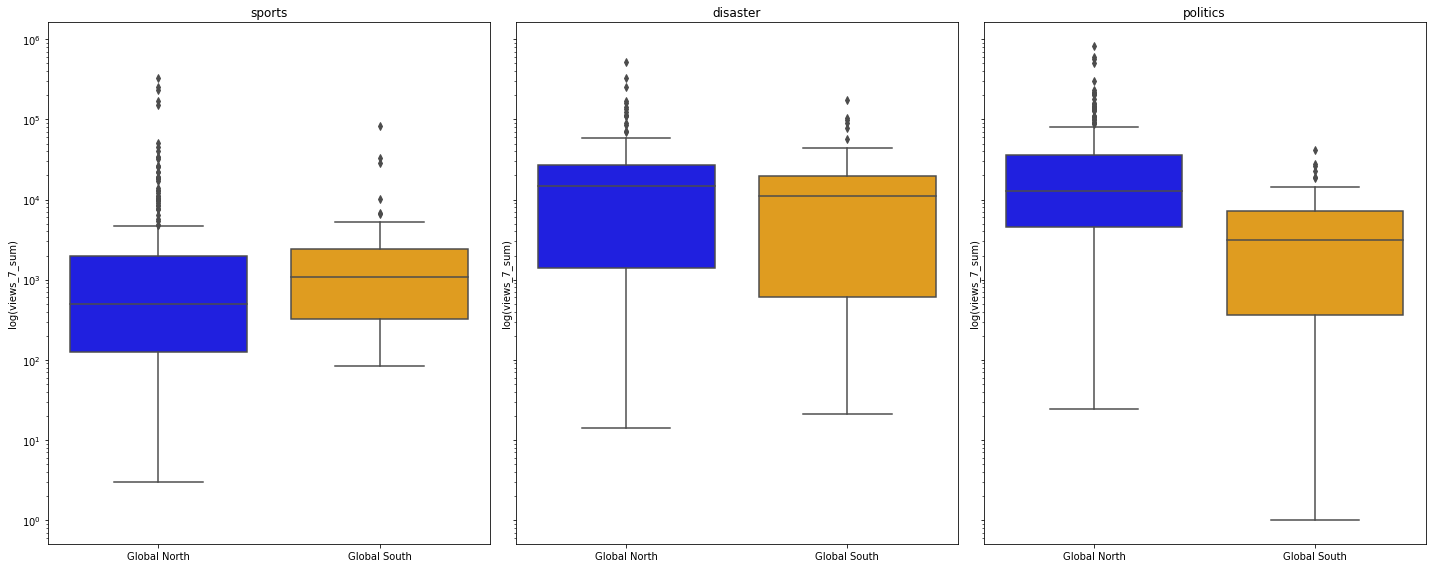

In [7]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(20, 8),tight_layout=True)

my_pal = {"Global North": "b", "Global South": "orange"}
box_plot = sns.boxplot(  x="economic_region", y="views_7_sum", palette=my_pal, data=df[df["cat"]=="sports"],  ax=axs[0])
box_plot.set(xlabel='',ylabel='log(views_7_sum)')
box_plot.set_yscale('log')
box_plot.set(title='sports')

my_pal = {"Global North": "b", "Global South": "orange"}
box_plot1 = sns.boxplot(  x="economic_region", y="views_7_sum", palette=my_pal, data=df[df["cat"]=="disaster"],  ax=axs[1])
box_plot1.set(xlabel='',ylabel='log(views_7_sum)')
box_plot1.set_yscale('log')
box_plot1.set(title='disaster')

my_pal = {"Global North": "b", "Global South": "orange"}
box_plot2 = sns.boxplot(  x="economic_region", y="views_7_sum", palette=my_pal, data=df[df["cat"]=="politics"],  ax=axs[2])
box_plot2.set(xlabel='',ylabel='log(views_7_sum)')
box_plot2.set_yscale('log')
box_plot2.set(title='politics')

plt.show()

In [60]:
df[(df.factor =="before") & (df.cat == "disaster")]

,pagetitle,event_date,economic_region,continent,cat,categories,views_7_sum,views_before_mean,views_before_sum,views_before_max,views_before_min,views_before_median,views_before_increase,list_views_7_days,diff_days,year,planed,surprising,factor,views_7_days_mean
148,Erdbeben in Kaohsiung 2016,2016-02-06,Global North,Asia,disaster,"['Kategorie:Erdbeben in Taiwan', 'Kategorie:Ka...",11155,0.0,0,0,0,0.0,0,"[1123, 2479, 4186, 225, 276, 132, 214]",-1,2016,planed,not_surprising,before,1233.571429
674,Giftgasangriff von Chan Schaichun,2017-04-04,Global South,Asia,disaster,"['Kategorie:ABC-Kriegsführung', 'Kategorie:Gou...",9807,0.0,0,0,0,0.0,0,[],-819,2017,planed,not_surprising,before,0.000000
679,Luftangriff auf den Militärflugplatz asch-Scha...,2017-04-07,Global South,Asia,disaster,['Kategorie:Beziehungen zwischen Syrien und de...,15205,0.0,0,0,0,0.0,0,"[9950, 4238, 525, 492]",-822,2017,planed,not_surprising,before,3801.250000


In [8]:
#df = df.drop(index = [148,674,679])
df = df[~((df.factor =="before") & (df.cat == "disaster"))]


correlation:  (0.7916814540526192, 8.447664858742791e-219)


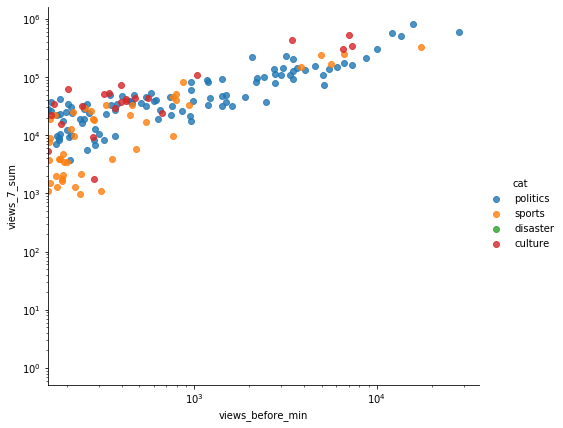

In [9]:
x = df['views_before_min']
y = df['views_7_sum']
print("correlation: ",scipy.stats.pearsonr(x, y) )
splot=sns.lmplot( x="views_before_min", y="views_7_sum", data=df, fit_reg=False, hue='cat', legend=True, height=6, aspect=1.2)
splot.set(yscale="log")
splot.set(xscale="log")
splot.set(title="")
plt.show()

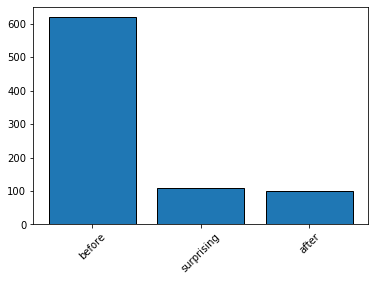

In [10]:
x = ['before', 'surprising','after']
a = len(df[(df["factor"]=="before")])
b = len(df[(df["factor"]=="surprising")])
c = len(df[(df["factor"]=="after")])
y1 = np.array([a, b, c])

plt.figure(figsize=(6,4))
p = plt.bar(x, y1,edgecolor="k")
plt.title("")
plt.xticks(rotation=45)
plt.show()

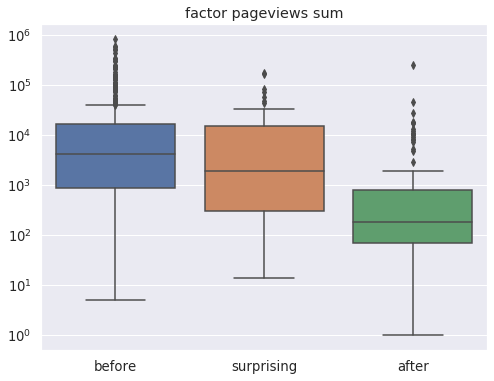

In [12]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
box_plot = sns.boxplot(  x="factor", y="views_7_sum", data=df)
box_plot.set(xlabel='',ylabel='')
box_plot.set_yscale('log')
box_plot.set(title='factor pageviews sum')
plt.show()

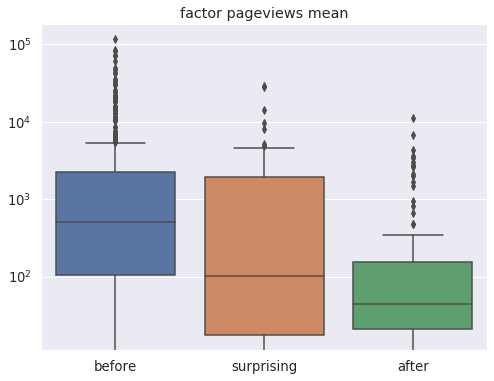

In [13]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
box_plot = sns.boxplot(  x="factor", y="views_7_days_mean", data=df)
box_plot.set(xlabel='',ylabel='')
box_plot.set_yscale('log')
box_plot.set(title='factor pageviews mean')
plt.show()

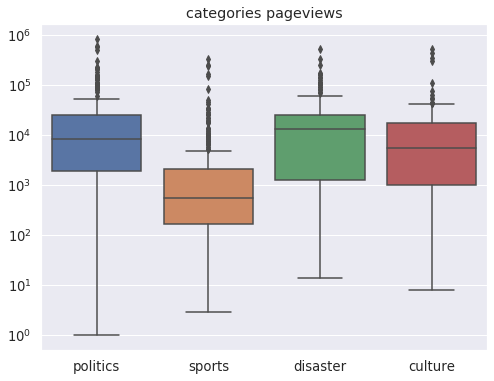

In [14]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
box_plot = sns.boxplot(  x="cat", y="views_7_sum", data=df)
box_plot.set(xlabel='',ylabel='')
box_plot.set_yscale('log')
box_plot.set(title='categories pageviews')
plt.show()

In [15]:
d = {'views_before_sum': df['views_before_sum'].apply(lambda x:np.log(x+1)),
     'views_before_mean': df['views_before_mean'].apply(lambda x:np.log(x+1)),
     'views_before_median': df['views_before_median'].apply(lambda x:np.log(x+1)),
     'views_before_max': df['views_before_max'].apply(lambda x:np.log(x+1)),
     'views_before_min': df['views_before_min'].apply(lambda x:np.log(x+1)),
     'views_before_increase': df['views_before_increase'].apply(lambda x:np.log(x+abs(min(df.views_before_increase))+1)),
     'views_7_sum': df['views_7_sum'].apply(lambda x:np.log(x+1)),
     'diff_days':df['diff_days'].apply(lambda x:np.log(x+abs(min(df.diff_days))+1)),
     'economic_region':df['economic_region'],
     'cat': df['cat'],
     'planed':df['planed'],
     'surprising': df['surprising'],
     'factor':df['factor']
    }
data = pd.DataFrame(data=d)

In [16]:
model = smf.ols(formula='views_7_sum ~ (views_before_min*cat)+(factor*economic_region)',data=data).fit()    
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            views_7_sum   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     124.7
Date:                Mon, 20 Dec 2021   Prob (F-statistic):          2.38e-166
Time:                        10:06:57   Log-Likelihood:                -1443.5
No. Observations:                 828   AIC:                             2911.
Df Residuals:                     816   BIC:                             2968.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                                4.9333      0.372     13.249      0.000       4.202       5.664
cat[T.disaster]                                          2.8809      0.383      7.527      0.000       2.130       3.632
cat[T.politics]                                          1.2474      0.358      3.488      0.001       0.545       1.949
cat[T.sports]                                           -0.4002      0.346     -1.155      0.248      -1.080       0.280
factor[T.before]                                         0.3315      0.231      1.433      0.152      -0.123       0.786
factor[T.surprising]                                     0.8399      0.234      3.585      0.000       0.380       1.300
economic_region[T.Global South]                         -1.4556      0.313     -4.650      0.000      -2.070      -0.841
factor[T.before]:economic_region[T.Global South]         1.1110      0.339      3.276      0.001       0.445       1.777
factor[T.surprising]:economic_region[T.Global South]     1.6233      0.424      3.830      0.000       0.791       2.455
views_before_min                                         0.8191      0.074     11.100      0.000       0.674       0.964
views_before_min:cat[T.disaster]                     -2.678e-15   6.68e-16     -4.010      0.000   -3.99e-15   -1.37e-15
views_before_min:cat[T.politics]                        -0.2285      0.080     -2.840      0.005      -0.386      -0.071
views_before_min:cat[T.sports]                          -0.1075      0.083     -1.298      0.195      -0.270       0.055
==============================================================================
Omnibus:                       20.663   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.319
Skew:                           0.020   Prob(JB):                     3.92e-10
Kurtosis:                       4.120   Cond. No.                     1.60e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.51e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:
model = smf.ols(formula='views_7_sum ~ (views_before_min*cat)+(factor*economic_region)+(diff_days*factor)',data=data).fit()    
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            views_7_sum   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     110.2
Date:                Mon, 20 Dec 2021   Prob (F-statistic):          2.67e-169
Time:                        10:06:57   Log-Likelihood:                -1431.6
No. Observations:                 828   AIC:                             2891.
Df Residuals:                     814   BIC:                             2957.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                              934.1568    214.036      4.364      0.000     514.029    1354.284
cat[T.disaster]                                          2.7560      0.379      7.278      0.000       2.013       3.499
cat[T.politics]                                          1.3153      0.353      3.723      0.000       0.622       2.009
cat[T.sports]                                           -0.4268      0.342     -1.247      0.213      -1.099       0.245
factor[T.before]                                      -931.7767    214.052     -4.353      0.000   -1351.935    -511.618
factor[T.surprising]                                     0.0096      0.003      3.114      0.002       0.004       0.016
economic_region[T.Global South]                         -1.2982      0.312     -4.166      0.000      -1.910      -0.687
factor[T.before]:economic_region[T.Global South]         0.9262      0.337      2.746      0.006       0.264       1.588
factor[T.surprising]:economic_region[T.Global South]     1.4869      0.420      3.544      0.000       0.663       2.311
views_before_min                                         0.8166      0.073     11.199      0.000       0.673       0.960
views_before_min:cat[T.disaster]                     -7.216e-11   1.66e-11     -4.359      0.000   -1.05e-10   -3.97e-11
views_before_min:cat[T.politics]                        -0.2357      0.079     -2.966      0.003      -0.392      -0.080
views_before_min:cat[T.sports]                          -0.0971      0.082     -1.185      0.236      -0.258       0.064
diff_days                                             -107.4350     24.747     -4.341      0.000    -156.010     -58.860
diff_days:factor[T.before]                             107.7708     24.748      4.355      0.000      59.193     156.348
diff_days:factor[T.surprising]                           0.0827      0.027      3.114      0.002       0.031       0.135
==============================================================================
Omnibus:                       18.381   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.702
Skew:                           0.082   Prob(JB):                     2.91e-08
Kurtosis:                       3.990   Cond. No.                     8.04e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.77e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""